**MBA em Ciência de Dados e Analytics do SENAI-CIMATEC**

**Disciplina - Introdução a Python**

**Professor - Braian Varjão**

**Alunos:**

**Luan Hereda**

**Rafael Bahia**

**Vinícius Spencer Santos**
________________________________________________________________________________
                                                      **Atividade Final**
________________________________________________________________________________

# **Conjunto de dados de previsão de insuficiência cardíaca**

Este conjunto de dados foi criado combinando diferentes conjuntos de dados já disponíveis de forma independente, mas não combinados antes. Neste conjunto de dados, 5 conjuntos de dados cardíacos são combinados em 11 características comuns, o que o torna o maior conjunto de dados de doenças cardíacas disponível até agora para fins de pesquisa. Os cinco conjuntos de dados usados ​​para sua curadoria são:

Cleveland: 303 observações

Húngaro: 294 observações

Suíça: 123 observações

Long Beach VA: 200 observações

Conjunto de dados Stalog (coração): 270 observações

Total: 1190 observações

Duplicado: 272 observações

Conjunto de dados final: 918 observações

- **Age:** Idade do cliente
- **Sex:** Sexo do cliente (F ou M)
- **ChestPainType:** Tipo de dor no peito (TA = Angina típica, ATA = Angina Atípica, NAP = Dor não anginosa, ASY = Assintomático)
- **RestingBP:** Pressão sanguínea em repouso
- **Cholesterol:** Nível de colesterol no sangue
- **FastingBS:** Nível de açucar no sangue (em jejum) (1: if FastingBS > 120 mg/dl, 0: otherwise)
- **RestingECG:** Resultados do Eletrocardiograma em repouso (Normal = Normal, ST = Com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão ST > 0,05 mV), HVE = mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes)
- **MaxHR:** Taxa máxima de batimentos cardíacos
- **ExerciseAngina:** Variável booleana que mostra se o paciente possui angina induzida por exercicios
- **Oldpeak:** oldpeak = ST (Valor numérico medido na depressão do ECG)
- **ST_Slope:** a inclinação do segmento ST do exercício de pico (UP = Ascendente, Down = Descendente , Flat = Plana)
- **HeartDisease:** Variável que afirma se o paciente possui ou não doenças cardíacas (1 = Possui, 0 = Não possui)


O conjunto de dados está disponível em um repositório no Kaggle que pode ser acessado através do link:

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

# 1 - Importando a Base de dados e as bibliotecas necessárias para análise

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
import sklearn


In [ ]:
mpl.rcParams["figure.figsize"] = [10, 7]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['axes.labelsize'] = 'medium'
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

plt.style.use('seaborn-whitegrid')

<ipython-input-17-971d7f4a76fa>:9: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [ ]:
# Importando o conjunto de dados do repositório do github
df = pd.read_csv(
    filepath_or_buffer = 'https://raw.githubusercontent.com/bahia-rafael/statistic-data/main/heart.csv',
    sep=',',
    decimal='.'
)

df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# 2 - Limpeza dos dados (se necessário)

In [ ]:
#VERIFICANDO VALORES VAZIOS E DTYPES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#VERIFICANDO SE HÁ LINHAS DUPLICADAS
df.duplicated().sum()

0

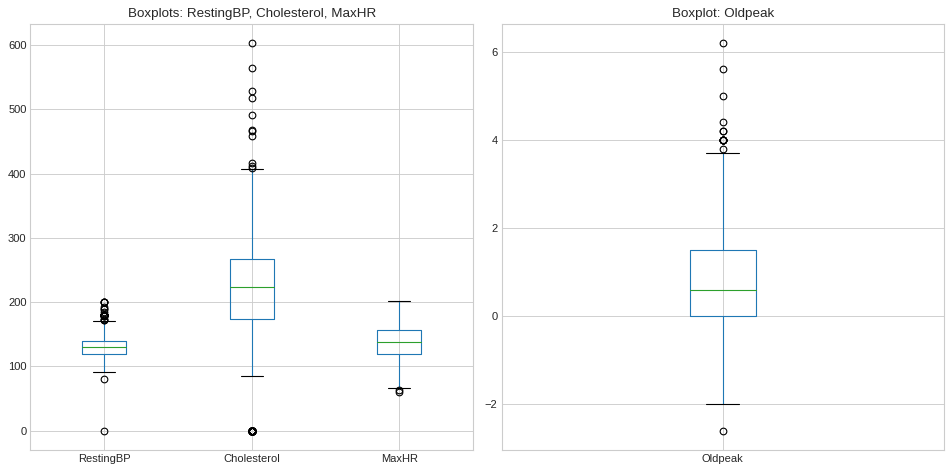

In [ ]:
#VERIFICANDO OUTLIERS (como as variáveis possuem escalas diferentes, fizemos em 2 imagens)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df.boxplot(column=['RestingBP', 'Cholesterol', 'MaxHR'], ax=axes[0])
axes[0].set_title('Boxplots: RestingBP, Cholesterol, MaxHR')

df.boxplot(column=['Oldpeak'], ax=axes[1])
axes[1].set_title('Boxplot: Oldpeak')

plt.tight_layout()
plt.show()

É possivel notar uma quantidade extremamente significante no boxplot da coluna "Colesterol". Possuindo uma quantidade muito grande de "0". Como sabemos que não é possivel esse valor, trataremos os dados como valores nulos a seguir.

In [ ]:
#visualizando que há muitos valores zerados
grafico = px.histogram(df, x = 'Cholesterol', color = "HeartDisease", text_auto = True, color_discrete_sequence=["purple", "black"])
grafico

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### TRATANDO OUTLIERS DA COLUNA "COLESTEROL" COM O MÉTODO KNN

In [ ]:
var_numericas = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
var_categoricas = ['Sex', 'ChestPainType', 'FastingBS','RestingECG', 'ExerciseAngina','ST_Slope']

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Transformando as colunas categoricas em numericas
df_temp = df.copy()
df_temp[var_categoricas] = df_temp[var_categoricas].astype('category')

cat_columns = df_temp.select_dtypes(['category']).columns
df_temp[cat_columns] = df_temp[cat_columns].apply(lambda x: x.cat.codes)

df_temp.head(5)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
df_treino = df_temp[df_temp['Cholesterol'] > 0]
df_teste = df_temp[df_temp['Cholesterol'] == 0]

x_treino = df_treino[['Age', 'RestingBP', 'MaxHR', 'Oldpeak', 'Sex', 'ChestPainType', 'FastingBS','RestingECG', 'ExerciseAngina','ST_Slope']]
y_treino = df_treino[['Cholesterol']]

x_teste = df_teste[['Age', 'RestingBP', 'MaxHR', 'Oldpeak', 'Sex', 'ChestPainType', 'FastingBS','RestingECG', 'ExerciseAngina','ST_Slope']]
y_teste = df_teste[['Cholesterol']]

if (len(x_teste) > 0):
  neigh = KNeighborsClassifier(n_neighbors=5)
  neigh.fit(np.array(x_treino), np.array(y_treino))
  predicoes = neigh.predict(np.array(x_teste))

  y_teste['Cholesterol'] = predicoes
  for idx, row in df_temp.iterrows():
    if (row.Cholesterol == 0):
      df_temp.loc[idx, ['Cholesterol']] = y_teste.loc[idx, ['Cholesterol']]

df[['Cholesterol']] = df_temp[['Cholesterol']]

df.head(5)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
grafico_new = px.histogram(df, x = 'Cholesterol', color = "HeartDisease", text_auto = True, color_discrete_sequence=["purple", "black"])
grafico_new

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# 3 - ANÁLISE UNIVARIADA

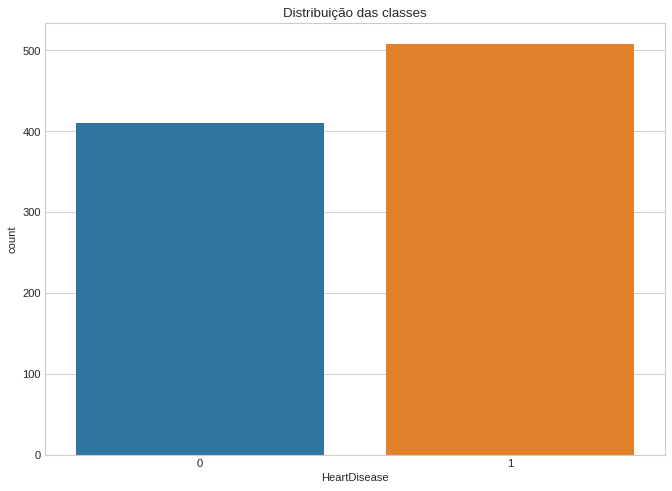

In [ ]:
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribuição das classes')
plt.show()

Temos mais casos de pessoas que possuem alguma doença cardiaca

In [ ]:
df_hd = df.groupby('HeartDisease').mean()
df_hd

<ipython-input-34-1d1501adaf92>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.551220,130.180488,236.431707,0.107317,148.151220,0.408049
1,55.899606,134.185039,231.031496,0.334646,127.655512,1.274213


- A coluna 'Oldpeak' que é um parametro do ECG(eletrocardiograma), apresenta uma discrepância considerável em relação a quem possui e quem não possui doença cardiaca. Essa tendência é confirmada no mapa de calor feito na análise bivariada.

- Quem possui doenças cardiacas, tende a possuir um valor máximo menor de batimentos cardiacos

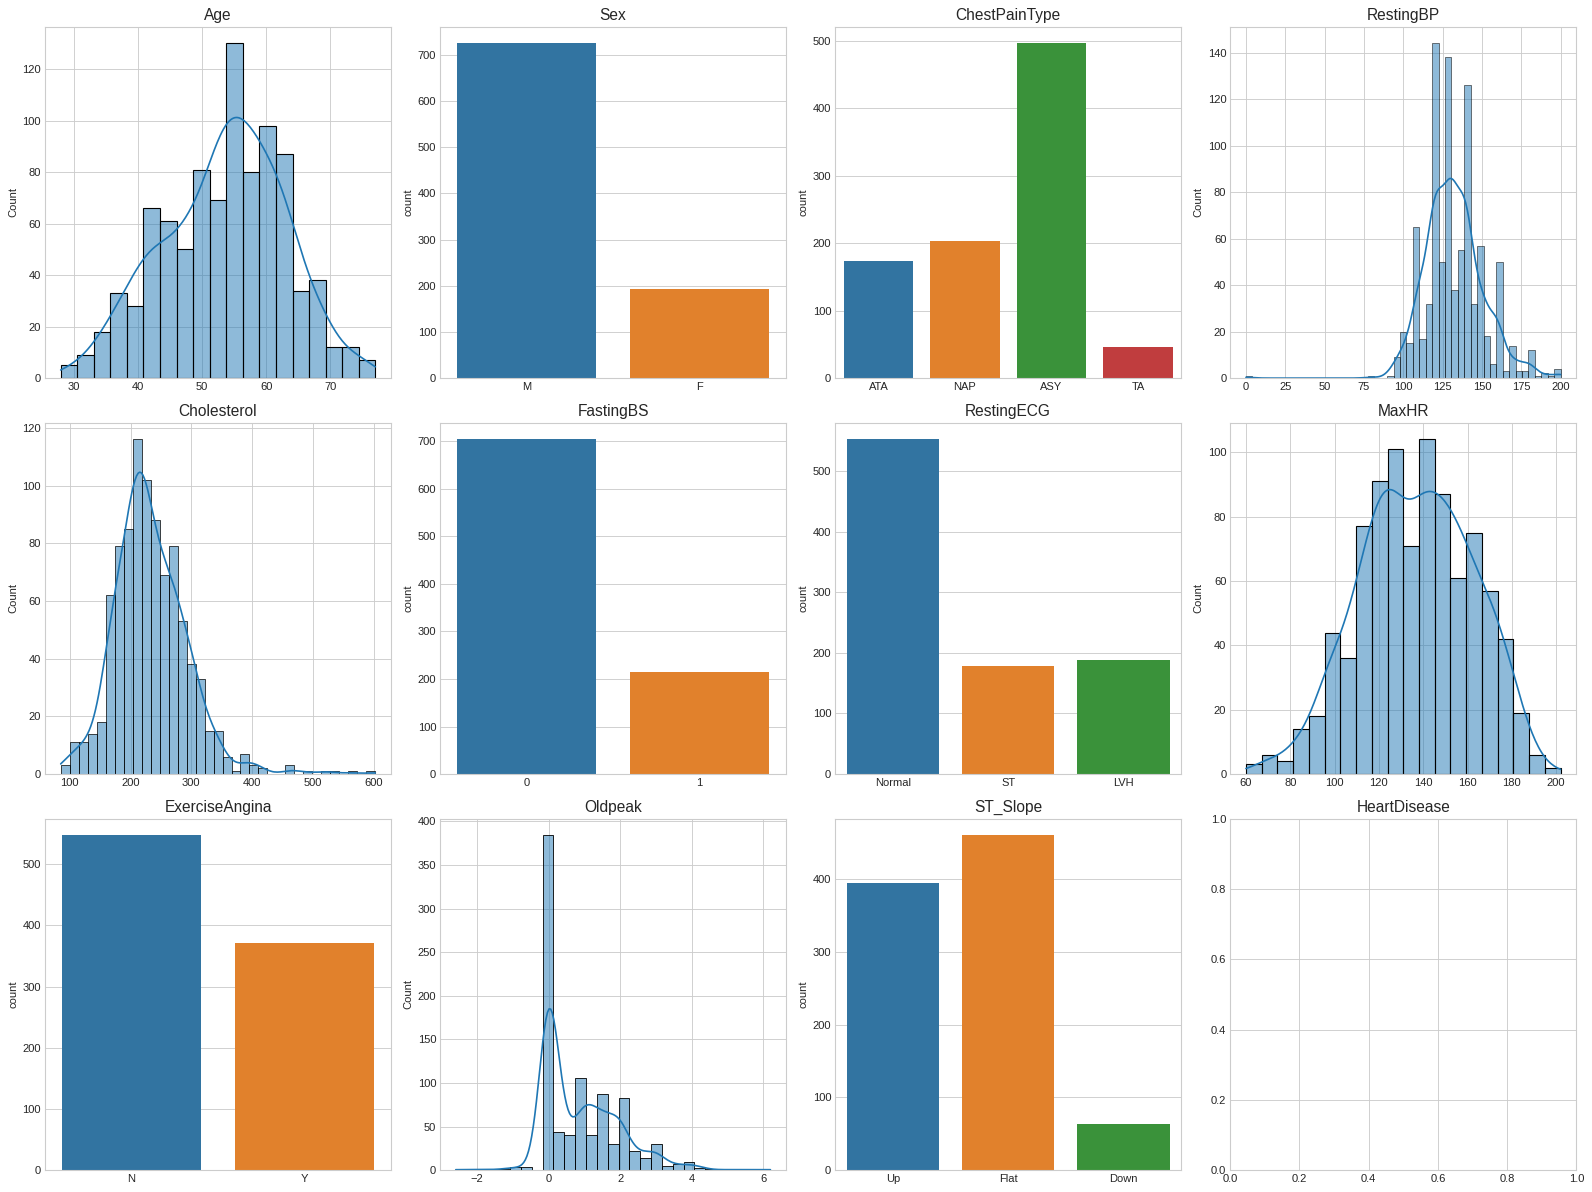

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

subplot_index = 0

for coluna in df.columns:
    row = subplot_index // 4
    col = subplot_index % 4
    axes[row, col].set_title(coluna, fontsize=14)

    if coluna in var_numericas:
        sns.histplot(df[coluna], kde=True, ax=axes[row, col])
        axes[row, col].set_xlabel('')

    elif coluna in var_categoricas:
        sns.countplot(x=df[coluna], ax=axes[row, col])
        axes[row, col].set_xlabel('')

    subplot_index += 1

plt.tight_layout()
plt.show()

- Os dados númericos possuem distribuições que se assemelham a uma distribuição normal
- A maioria das nossas observações são de pessoas do sexo masculino
- É extremamente comum o paciente ser assintomático (para dores no peito)
- Temos mais pessoas observadas com uma taxa normal de açucar no sangue
- A maioria das pessoas observadas não sentem angina durante exercicios


# 4 - ANÁLISE BIVARIADA

## Relação inicial entre variáveis

<ipython-input-36-11f4a6b3659f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

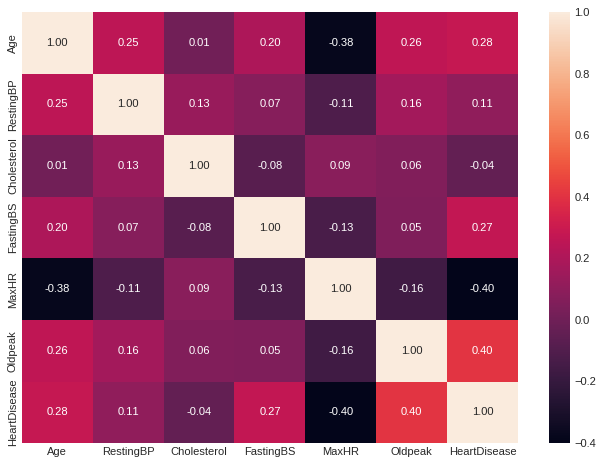

In [ ]:
sns.heatmap(df.corr(), annot = True, fmt='.2f')

## Relacionando colunas catégoricas com nosso 'target' (HeartDisease)

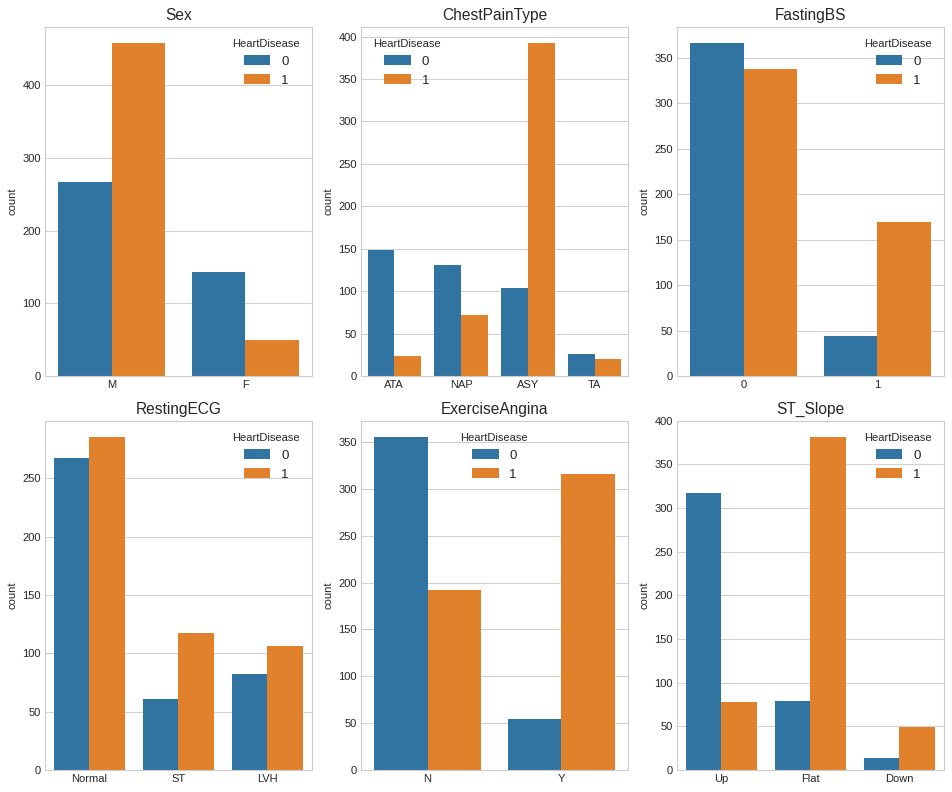

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 10))

subplot_index = 0

for c in df.columns:
    if c in var_categoricas and subplot_index < 9:
        row = subplot_index // 3
        col = subplot_index % 3
        axes[row, col].set_title(f'{c}', fontsize=14)
        sns.countplot(x=df[c], hue=df['HeartDisease'], ax=axes[row, col])
        axes[row, col].set_xlabel('')
        subplot_index += 1

plt.tight_layout()
plt.show()

- Proporcionalmente, é mais comum identificarmos pessoas do sexo masculino possuindo alguma doença cardiaca
- Apesar de ser contraintutivo, possuimos uma taxa alta de pessoas assintomáticas (para dores no peito) que possuem alguma doença cardiaca. O que é um indicativo para aumentar o cuidado observando outros fatores.
- Normalmente, pessoas com uma alta taxa de açucar no sangue possuem alguma doença cardiaca. Entretanto, não ter uma taxa alta de açucar no sangue não é garantia de não possuir alguma doença.
- Pessoas que relataram angina durante exercicios normalmente possuem alguma doença cardiaca.

## Relacionando colunas númericas com nosso 'target' (HeartDisease)

<Figure size 1200x640 with 0 Axes>

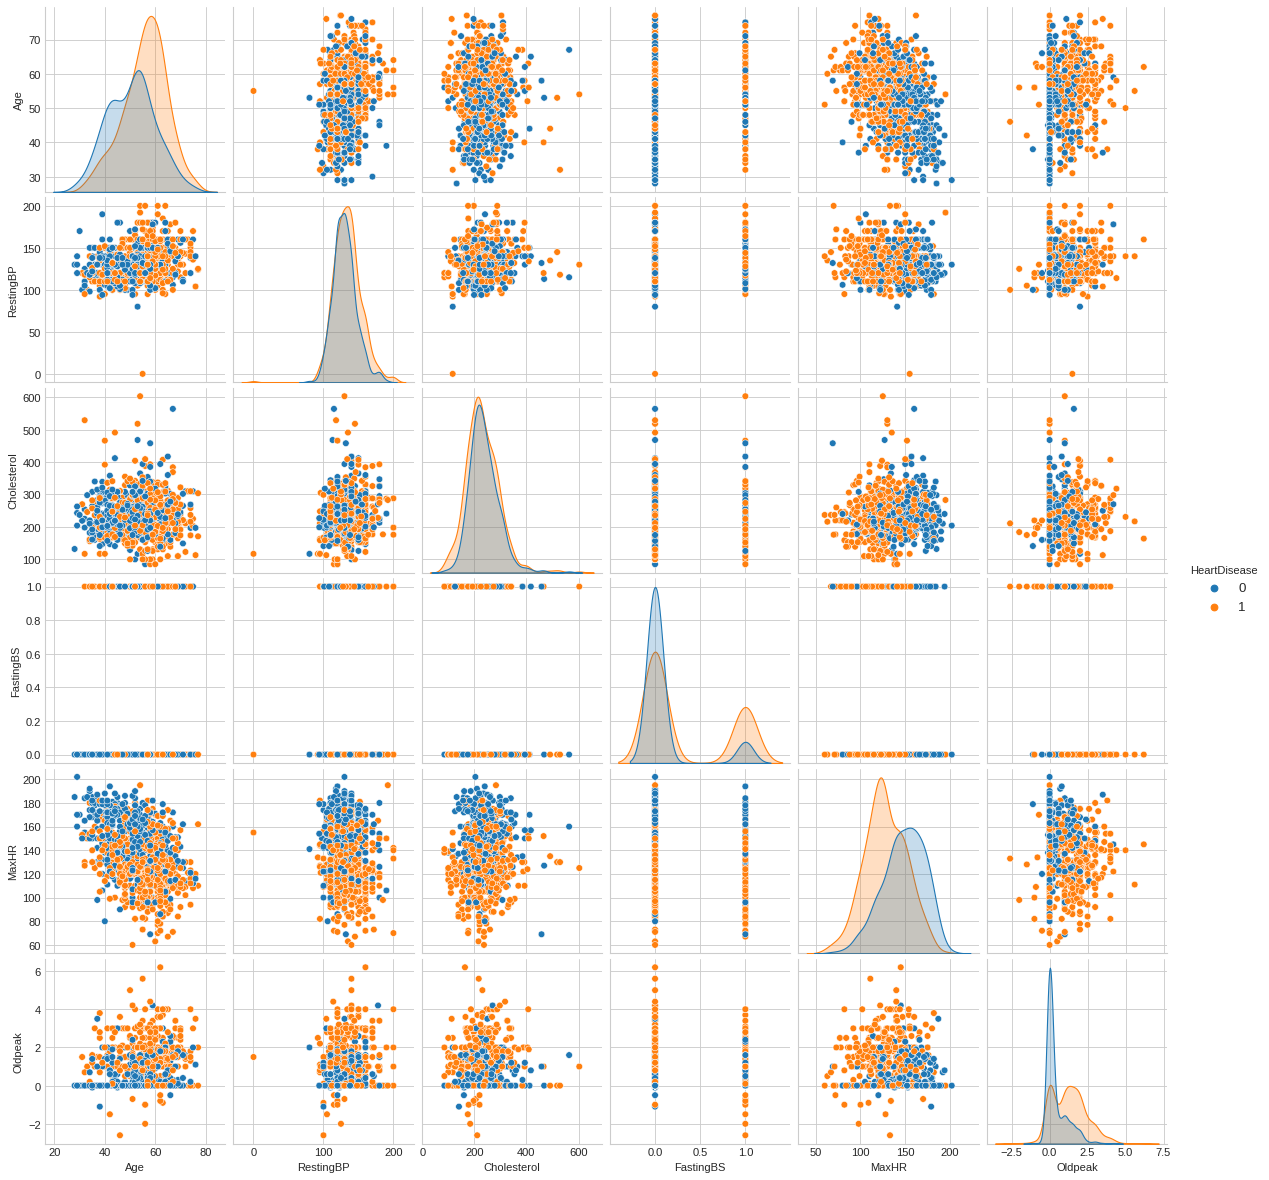

In [ ]:
plt.figure(figsize = (15,8))
sns.pairplot(df, hue = "HeartDisease")

## Análise sobre os tipos de dores no peito (angina) em relação a: Idade (age) e sexo (Sex)

In [ ]:
ctp_age_df = df.groupby('ChestPainType')['Age'].mean().reset_index()
ctp_age_df = ctp_age_df.sort_values(by='Age', ascending=False)
ctp_age_df

,ChestPainType,Age
0,ASY,54.959677
3,TA,54.826087
2,NAP,53.310345
1,ATA,49.242775


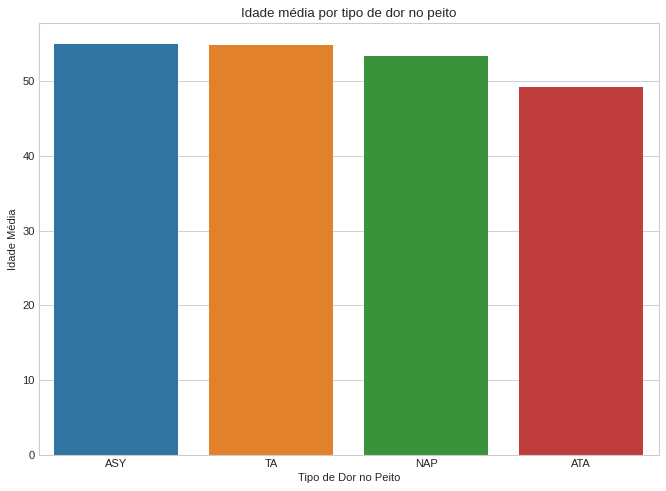

In [ ]:
sns.barplot(x='ChestPainType', y='Age', data=ctp_age_df)
plt.title('Idade média por tipo de dor no peito')
plt.xlabel('Tipo de Dor no Peito')
plt.ylabel('Idade Média')
plt.show()

- A idade da pessoa não aparenta ter impacto significativo no tipo de dor no peito que a pessoa vai sentir.

<Figure size 640x480 with 0 Axes>

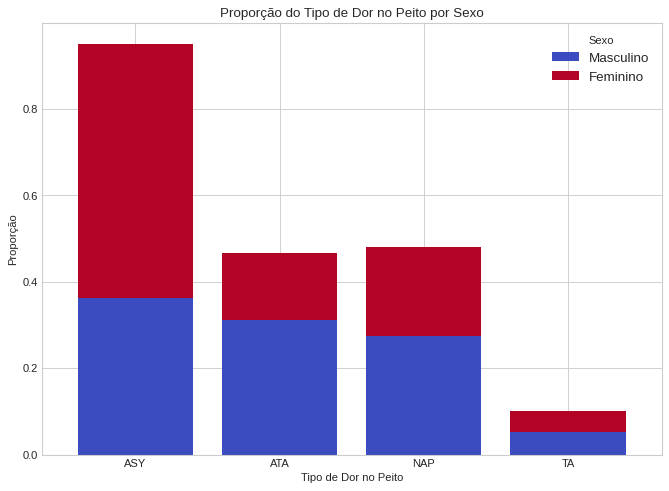

In [ ]:
total_m = df[df['Sex'] == 'M'].shape[0]
total_f = df[df['Sex'] == 'F'].shape[0]

ctp_sex_proporcao = df.groupby(['ChestPainType', 'Sex']).size().unstack() / df.groupby('Sex').size() #proporção de dor no peito para homens e mulheres (visto que tem muito mais homens na base de dados, o grafico ficaria desproporcional sem isso)

plt.figure(figsize=(8, 6))
ctp_sex_proporcao.plot(kind='bar', stacked=True, cmap='coolwarm', width=0.8)
plt.title('Proporção do Tipo de Dor no Peito por Sexo')
plt.xlabel('Tipo de Dor no Peito')
plt.ylabel('Proporção')
plt.legend(title='Sexo', loc='upper right', labels=['Masculino', 'Feminino'])
plt.xticks(rotation=0)
plt.show()

Gráfico feito pensando na diferença de observações pra homens e mulheres. Como os números eram muito discrepantes, utilizamos a proporção.

- Proporcionalmente, é mais comum mulheres serem assintomáticas para dores no peito
- Seguindo a lógica, homens tem uma tendência maior a possuir algum tipo de dor no peito (seja ela tipica ou não).

## Análise sobre os batimentos cardiacos máximos em relação ao sexo e a angina em exercicios

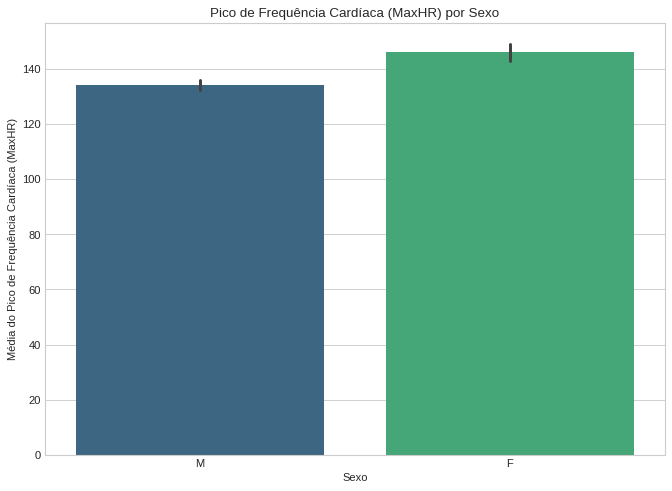

In [ ]:
sns.barplot(x='Sex', y='MaxHR', data=df, palette='viridis')
plt.title('Pico de Frequência Cardíaca (MaxHR) por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Média do Pico de Frequência Cardíaca (MaxHR)')
plt.show()

- Apesar de não possuir uma diferença muito relevante, mulheres tendem a possuir uma frequência máxima de batimentos cardiacos mais alta.

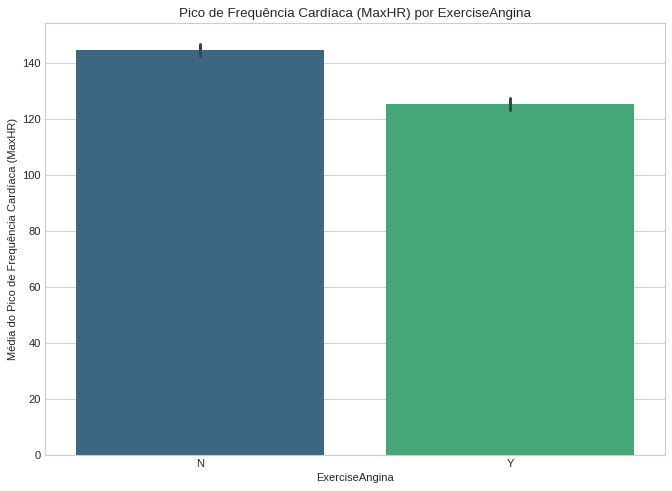

In [ ]:
sns.barplot(x='ExerciseAngina', y='MaxHR', data=df, palette='viridis')
plt.title('Pico de Frequência Cardíaca (MaxHR) por ExerciseAngina')
plt.xlabel('ExerciseAngina')
plt.ylabel('Média do Pico de Frequência Cardíaca (MaxHR)')
plt.show()

- Normalmente, quem sente angina ao realizar exercicios possui uma taxa máxima de batimentos cardiacos mais baixa

- Isso casa com o fato visto anteriormente de pessoas que possuem alguma doença cardiaca terem uma taxa máxima de batimentos cardiacos mais baixa também
